<a href="https://colab.research.google.com/github/sa96102/Python_exam/blob/master/Torchvision_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchvision
!pip install torchtext -U

     |████████████████████████████████| 81kB 3.0MB/s 
     |████████████████████████████████| 1.0MB 10.0MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print('pytorch', torch.__version__)
print('torchvision', torchvision.__version__)

pytorch 1.4.0
torchvision 0.5.0


In [0]:
IMG_SIZE = 480

COLORS = np.array([
    (0, 0, 0),       # 0=background
    (128, 0, 0),     # 1=aeroplane
    (0, 128, 0),     # 2=bicycle
    (128, 128, 0),   # 3=bird
    (0, 0, 128),     # 4=boat
    (128, 0, 128),   # 5=bottle
    (0, 128, 128),   # 6=bus
    (128, 128, 128), # 7=car
    (255, 255, 255), # 8=cat
    (192, 0, 0),     # 9=chair
    (64, 128, 0),    # 10=cow
    (192, 128, 0),   # 11=dining table
    (64, 0, 128),    # 12=dog
    (192, 0, 128),   # 13=horse
    (64, 128, 128),  # 14=motorbike
    (192, 128, 128), # 15=person
    (0, 64, 0),      # 16=potted plant
    (128, 64, 0),    # 17=sheep
    (0, 192, 0),     # 18=sofa
    (128, 192, 0),   # 19=train
    (0, 64, 128)     # 20=tv/monitor
])

### Download Model (DeepLabV3)

In [5]:
deeplab = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


### Load Image

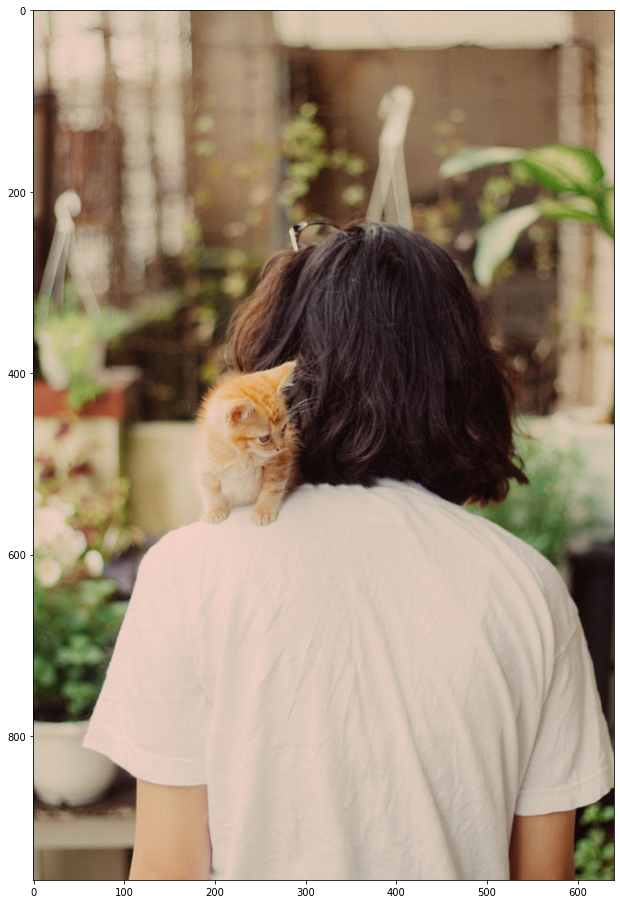

In [8]:
img = Image.open('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/torchvision/03.jpg')

plt.figure(figsize=(16, 16))
plt.imshow(img)

### Image to Tensor

In [0]:
trf = T.Compose([
    T.Resize(IMG_SIZE), # 이미지를 해당 크기로 리사이즈.(가로 세로 비율 유지.)
    T.ToTensor(), # 0~1사이의 값을 가지는 tensor로 변환.
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) # image tensor에서 mean을 빼고 std로 나누어 normalize.
])

input_img = trf(img).unsqueeze(0) # unsqueeze()_해당 dimension에 차원 추가.

### Inference

In [10]:
out = deeplab(input_img)['out']

print(out.shape) # 1은 batch size, 21은 classes(클래스의 개수. 각 채널마다 해당 클래스일 확률이 저장되어 있음. 즉, 21개의 물건 구별 가능.), 719, 480은 image size.

torch.Size([1, 21, 719, 480])


### Extract Class Map

In [11]:
out = torch.argmax(out.squeeze(), dim=0) # tensor.squeeze()_shape가 1인 axis를 삭제.
out = out.detach().cpu().numpy()

print(out.shape)
print(np.unique(out)) # np.unique()_배열에서 유일한 값을 뽑아냄. out에는 class의 index가 있음. 여기서는 0(background), 8(cat), 15(person), 16(potted plant)의 클래스가 검출된 것을 확인.

(719, 480)
[ 0  8 15 16]


### Class map to Segmentation map

In [0]:
def seg_map(img, n_classes=21):
    rgb = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8) # np.zeros()_0으로 채운 shape 형태의 배열 생성.

    for c in range(n_classes):
        idx = img == c

        rgb[idx] = COLORS[c]

    return rgb

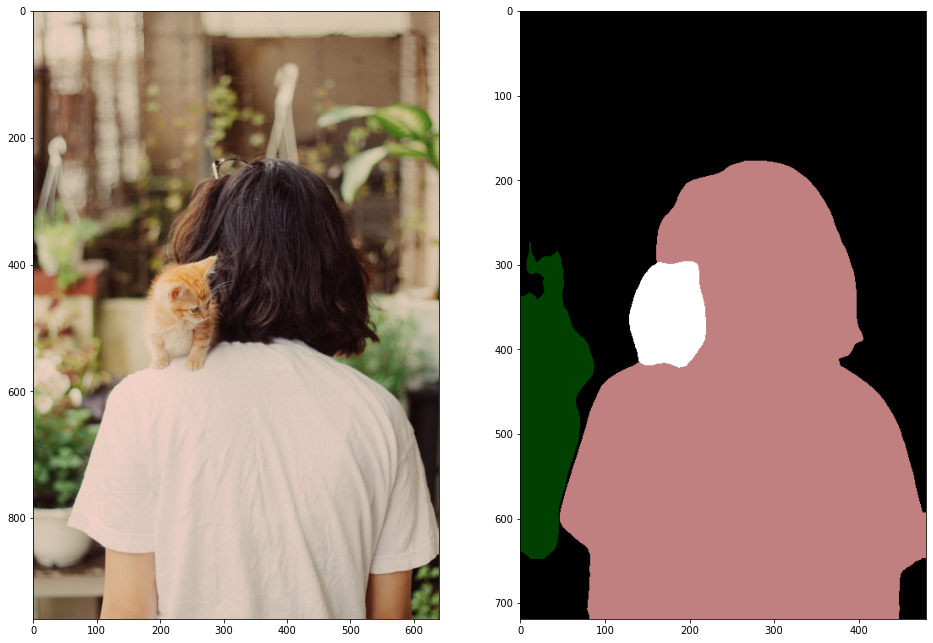

In [13]:
out_seg = seg_map(out)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
ax[0].imshow(img)
ax[1].imshow(out_seg)